this is just trying out MCMC code. This code is the implementation if Metrapolis-Hastings, 
code from [here](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/), I am redoing it with some notes for myself here. 

In [35]:
# this is just trying out MCMC code. This code is the implementation if Metrapolis-Hastings, 
# I am hopeful that I implement the Gibbs Sampling myself!
# code from: http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/

%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)


<type 'numpy.ndarray'>


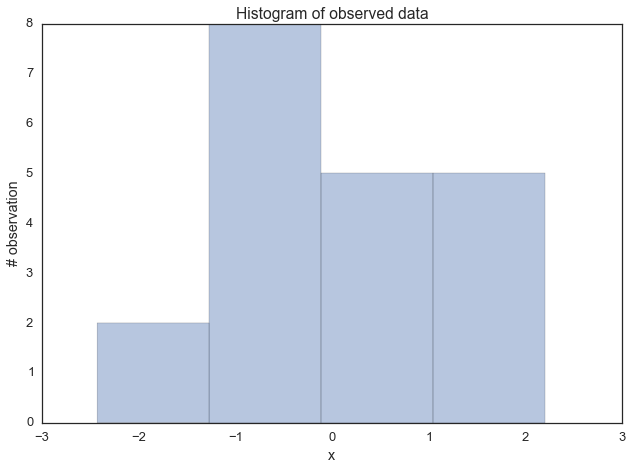

In [13]:
# generating normal random 
data = np.random.randn(20)
print type(data)
data[0:10]

ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', 
           ylabel='# observation')



### This is not a scientific explanation of the method and instead is just some self notes and my line of thought as I get more comfortable with Bayesian Modeling ###

**This is the data!**

So we got this randomly generated data. Now we want to model it with a distribution. It could be a complex model with several random variables, but this one is simple and we can *guess* what is the distribution, it is Normal. I believe (I am still learning) that the choice of distribution is dependent on our knowledge from the source of the data, there are examples for Poisson, Exponential and Normal distributions in the course. We might use several random variables for modeling our data. 

**So we got these distributions for the model (one or several distributions), what is next?**

Each of these distiributions have parameters. In this case, we have to find $\mu$ and $\sigma$ for our normal distribution. For simplicity, it is assumed that $\sigma = 1$ and we just have to find $\mu$. Here is where the fun begins! We have to pick a *prior* distribution for each parameter we want to find and then based on the data, we *learn the posterior* distribution for our parameter. We are done once we larned that :D 

**But, how?**

From my earlier practices of Bayesian modeling, I had learned that the posterior could be calculated and the magic would happen when you write it down and the posterior would just show itself as a different distribution with its parameters. (If they are the same family of distributions with different parameters, is a sweet nice case called *the conjugate priors* and you won't even need to do any calculations, that straight forward!). So it could actually be very simple. However, as it turns out, in most of the cases you can't get the posterior distribution that simple and this is where MCMC (Markov Chain Monte Carlo, *Wow that name, one thinks: high class stuff dude, high class stuff!*) method comes to help. The MCMC methods (Metrapolis-Hastings as a general form and it's sub-groups, Gibbs sampling, Independence proposal and Random walk) are simply random sample generators. How they help here? :D They generate samples for you from your posterior distribution. Isn't that beautiful? Isn't that cool? So what happens is that you generate many many samples using these methods and then once you have a big enough sample size, you can learn the parameters of your posterior distribution. There are many great articles explaining the concept of MCMC and how it works at different levels. I don't want to bother with that here and wanted to get straight to the code instead. 

In [50]:
# assuming the prior distribution for the mu is normal, with mu=0 and sd=1

mu_prior_mu = 0
mu_prior_sd = 1

# the starting position for the search in the parameter step, we just give
# a random mu. Doesn't really matter! 
mu_current = 1

# the proposed step to jump, based on our current step -
# this is my proposal function, this is what gets us to the next step
mu_proposal = norm(mu_current, proposal_width).rvs()

# the likelihood of each point of our data being from this distribution.
# pdf() returns the probablity of observation based on the defined distribution,
# the prod() is simply production of the resulted vector
likelihood_current = norm(mu_current, 1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

# prior probability of the current and proposed mu
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

# the posterior probability for the current mu and the proposed mu
p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal 

So basically, we are sampling from our posterior distribution here using our proposal function (with the mu_current and proposal_width). The piont is that, we don't have to have our posterior function for MCMC, we just need to have our *posterior probability* for each stochastic step proposed (p_proposal) and if we want to take that step (accept it as a variable for the posterior) or not, merely based on the probablity of the current step (p_current) and the proposed step(p_proposal). From the Bayes formula: 

$p(\theta|y) = \frac{p(y|\theta)p(\theta)}{(p(y))}$

Where our $p(y|\theta)$ is the likelihood of the observations (here, the data) based on the *current or proposed* parameter (and therefore we have two). The $p(\theta)$ is simply the probability of the parameter based the prior distribution, not a big deal. So we got it all, almost...

**What about $p(y)$ then?**  Yes, that,,,

Well, I am not really sure, but actually we don't need it for MCMC. Why? Cause the final goal is to decide to accept or reject the proposed varibale (mu) and for that, we don't need $p(y)$.

This is sweet and simple. We basically need to compare the two posteror probabilities for our two mu's. *IF* our proposed mu has a bigger posterior probability, we accept it with a probability $\alpha$, which is proportional to our posteriors' proportion. $p(y)$ is the same for both of them, cause $y$ is not a random variable, it is the actual data that we are observing and it won't change from current to proposal parameter. 

I think this is the most straight forward implementation of the MCMC with Metropolis-Hastings. The function comes in the following. For me, the remianings are:

How do we do it for more complicated models? I suspect Gibbs Sampling is going to be more straight forward there (it is also very popular, I am not sure what are its shortcomings though). 